# Datacamp Career Track: Data Scientist with Python

### Contents

1. [Introduction_to_Python]([01]Introduction_to_Python.ipynb)
1. [Intermediate Python for Data Science]([02]Intermediate_Python_for_Data_Science.ipynb)
1. [Python Data Science Toolbox (Part 1)]([03]Python_Data_Science_Toolbox_Part1.ipynb)
1. [Python Data Science Toolbox (Part 2)]([04]Python_Data_Science_Toolbox_Part2.ipynb)
1. [Importing Data in Python (Part 1)]([05]Importing_Data_in_Python_Part1.ipynb)
1. [Importing Data in Python (Part 2)]([06]Importing_Data_in_Python_Part2.ipynb)
1. [Cleaning Data in Python]([07]Cleaning_Data_in_Python.ipynb)
1. [Pandas Foundations]([08]Pandas_Foundations.ipynb)
1. [Manipulating DataFrames with Pandas]([09]Manipulating_DataFrames_with_Pandas.ipynb)
1. [Merging DataFrames with Pandas]([10]Merging_DataFrames_with_Pandas.ipynb)
1. [Intro to SQL for Data Science]([11]Intro_to_SQL_for_Data_Science.ipynb)
1. [Introduction to Databases in Python]([12]Introduction_to_Databases_in_Python.ipynb)
1. [Introduction to Data Visualization with Python]([13]Introduction_to_Data_Visualization_with_Python.ipynb)
1. [Interactive Data Visualization with Bokeh]([14]Interactive_Data_Visualization_with_Bokeh.ipynb)
1. [Statictical Thinking in Python (Part 1)]([15]Statictical_Thinking_in_Python_Part1.ipynb)
1. [Statictical Thinking in Python (Part 2)]([16]Statictical_Thinking_in_Python_Part2.ipynb)
1. [Joining Data in SQL]([17]Joining_Data_in_SQL.ipynb)
1. [Supervised Learning with scikit-learn]([18]Supervised_Learning_with_scikit-learn.ipynb)
1. [Machine Learning with the Experts: School Budgets]([19]Machine_Learning_with_the_Experts_School_Budgets.ipynb)
1. [Unsupervised_Learning_in_Python]([20]Unsupervised_Learning_in_Python.ipynb)
1. [Deep Learning in Python]([21]Deep_Learning_in_Python.ipynb)
1. [Network Analysis in Python]([22]Network_Analysis_in_Python.ipynb)


## Course 16: Statictical Thinking in Python (Part 2)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

## 1. Optimal parameters

### Histogram of Michelson's measurements

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/Histogram_of_Michelsons_measurements.png' alt='Histogram of Michelsons measurements' width=400 align='left'>

### Computing the ECDF

In [2]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### Checking Normality of Michelson data

In [3]:
michelson = pd.read_csv('[16]Statictical_Thinking_in_Python_Part2/michelson_speed_of_light.csv')
michelson_speed_of_light = michelson['velocity of light in air (km/s)']

In [4]:
mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light)

samples = np.random.normal(mean, std, size=10000)

x, y = ecdf(michelson_speed_of_light)
x_theor, y_theor = ecdf(samples) 

### CDF of Michelson's measurements

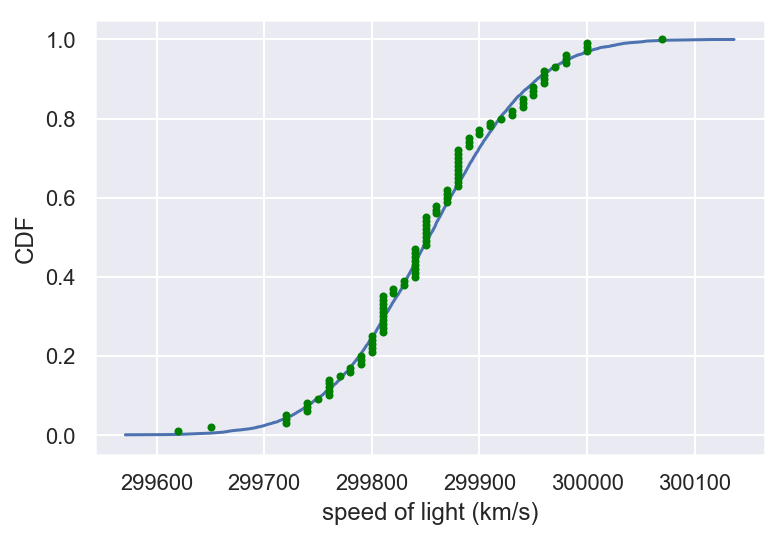

In [5]:
sns.set()

plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none', color='green')

plt.xlabel('speed of light (km/s)')
plt.ylabel('CDF')

plt.show()

### CDF with bad estimate of st. dev.

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/CDF_with_bad_estimate_of_std.png' alt='CDF with bad estimate of std' width=400 align='left'>

### CDF with bad estimate of mean

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/CDF_with_bad_estimate_of_mean.png' alt='CDF with bad estimate of mean' width=400 align='left'>

### Optimal parameters

* Parameter values that bring the model in closest agreement with the data

### Mass of MA large mouth bass

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/Mass_of_MA_large_mouth_bass.png' alt='Mass of MA large mouth bass' width=500 align='left'>

### Packages to do statistical inference

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/Packages_to_do_statistical_inference.png' alt='Packages to do statistical inference' width=400 align='left'>

### №1 How often do we get no-hitters?

In [6]:
mlb = pd.read_csv('[16]Statictical_Thinking_in_Python_Part2/mlb_nohitters.csv')

nohitter_times = []

for i in range(len(mlb) - 1, len(mlb) - 252, -1):
    nohitter_times.append(mlb['game_number'][i] - mlb['game_number'][i-1] - 1)

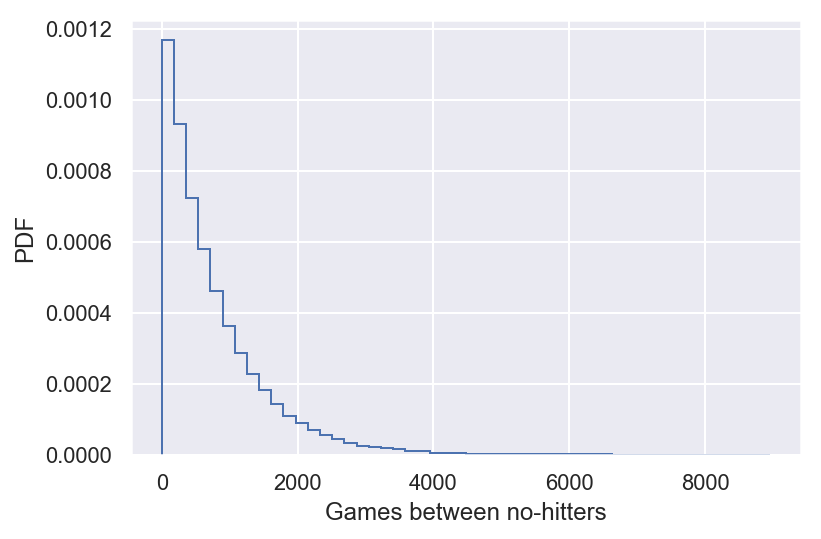

In [7]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
plt.hist(inter_nohitter_time, bins=50, normed=True, histtype='step')

plt.xlabel('Games between no-hitters')
plt.ylabel('PDF')

# Show the plot
plt.show()

### №2 Do the data follow our story?

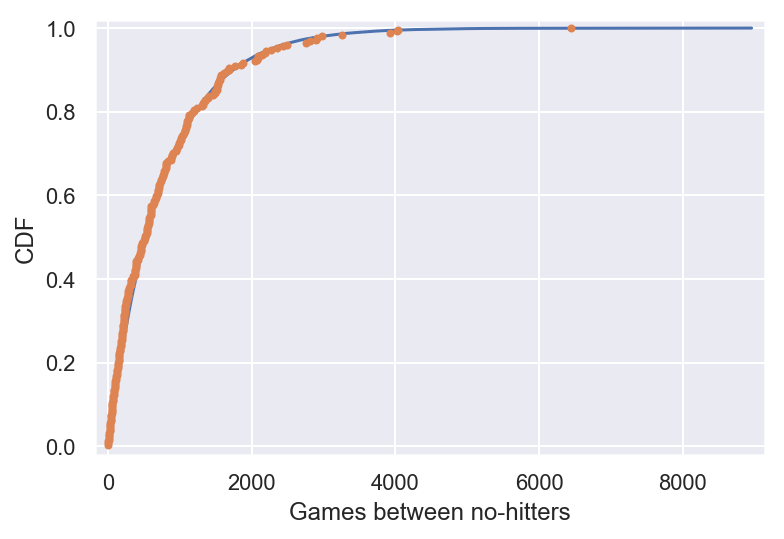

In [8]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

### №3 How is this parameter optimal?

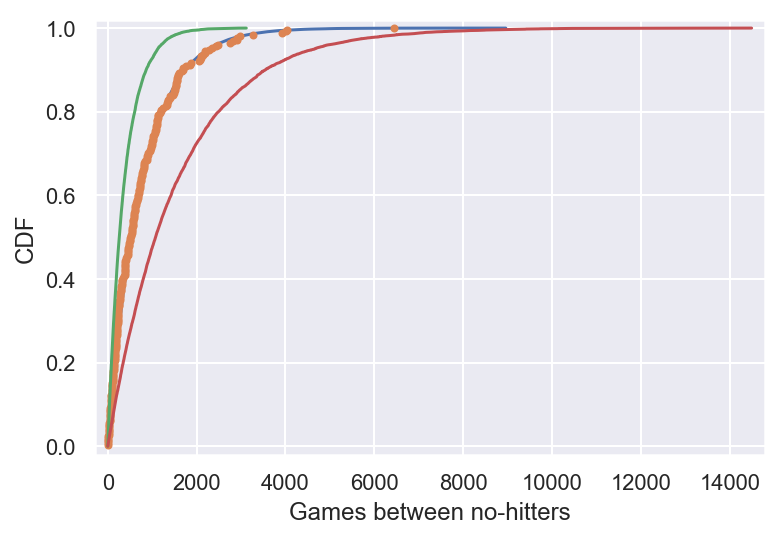

In [9]:
np.random.seed(42)

# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

plt.margins(0.02)

plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
plt.plot(x_half, y_half)
plt.plot(x_double, y_double)

# Show the plot
plt.show()

## 2. Linear regression by least squares

### 2008 US swing state election results

In [10]:
df_swing = pd.read_csv('[16]Statictical_Thinking_in_Python_Part2/2008_swing_states.csv')
total_votes = df_swing['total_votes']
dem_share = df_swing['dem_share']

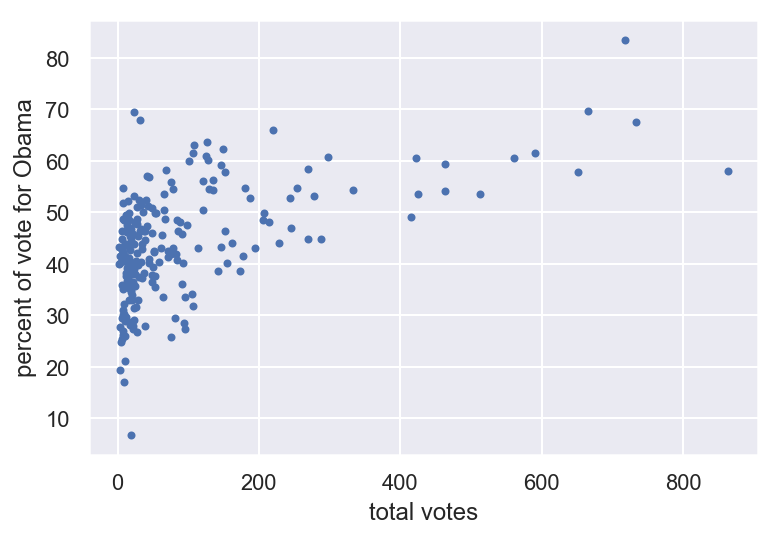

In [11]:
plt.scatter(total_votes/1000, dem_share, marker='.')

plt.xlabel('total votes')
plt.ylabel('percent of vote for Obama')

plt.show()

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/slope.png' alt='Slope' width=400 align='left'>

### Residuals

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/Residuals.png' alt='Residuals' width=400 align='left'>

### Least squares

* The process of finding the parameters for which the sum of the squares of the residuals is minimal

### Least squares with `np.polyfit()`

In [12]:
slope, intercept = np.polyfit(total_votes, dem_share, 1)
slope

4.037071700946557e-05

In [13]:
intercept

40.11391196864175

### №4 EDA of literacy/fertility data

In [14]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    
    # Return entry [0,1]
    return corr_mat[0,1]

In [15]:
literacy = pd.read_csv('[16]Statictical_Thinking_in_Python_Part2/female_literacy_fertility.csv')

illiteracy = abs(np.array(literacy['female literacy']) - 100)
fertility = literacy['fertility']

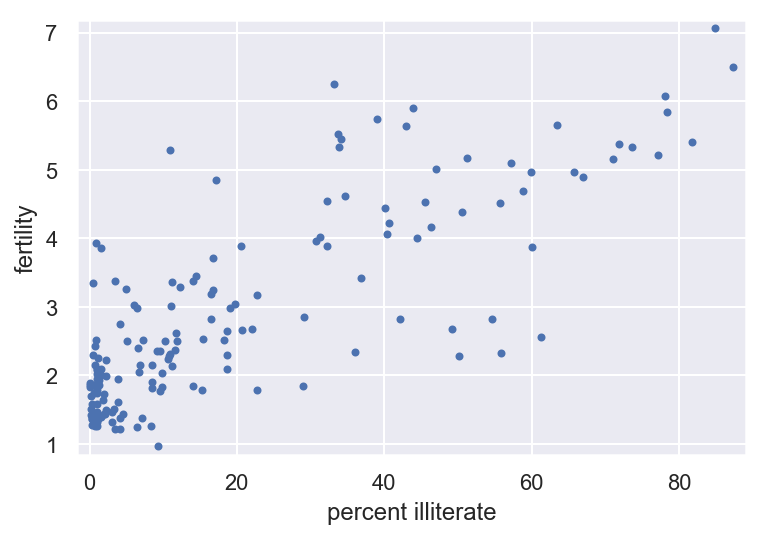

In [16]:
# Plot the illiteracy rate versus fertility
plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)

plt.xlabel('percent illiterate')
plt.ylabel('fertility')

plt.show()

In [17]:
# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

0.8041324026815344


### №5 Linear regression

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


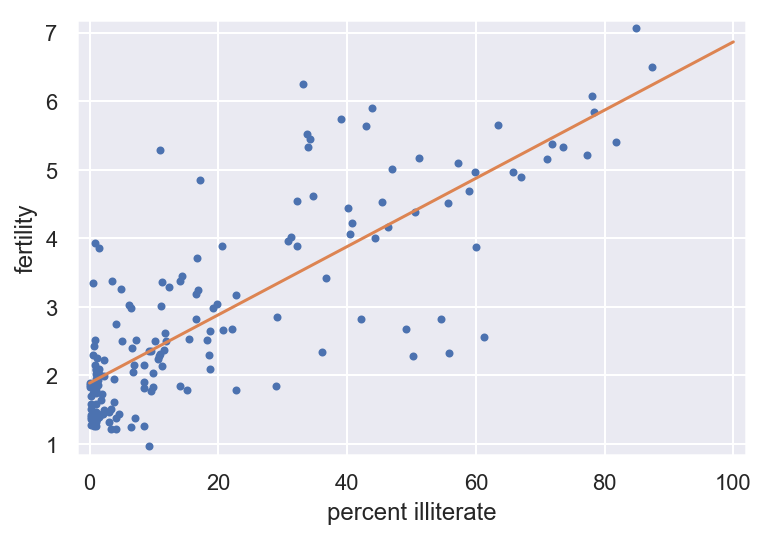

In [18]:
# Plot the illiteracy rate versus fertility
plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('percent illiterate')
plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
plt.plot(x, y)

# Draw the plot
plt.show()

### №6 How is it optimal?

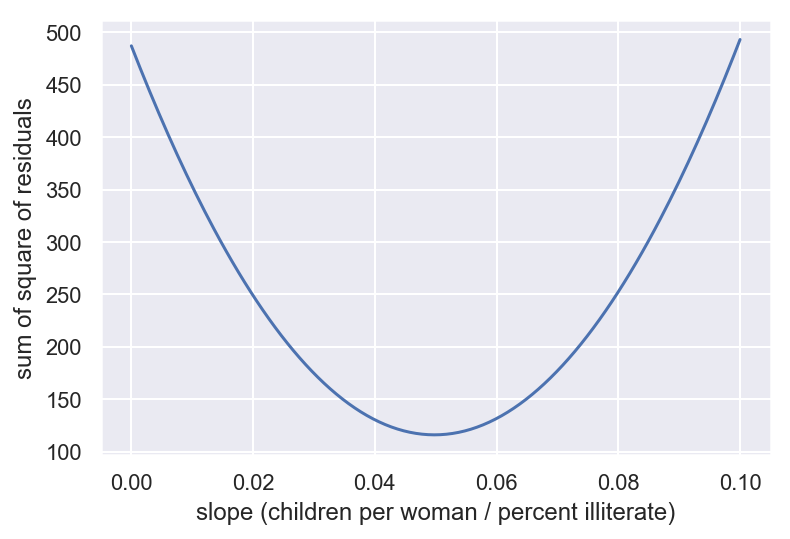

In [19]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')

plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

## 3. The importance of EDA: Anscombe's quartet

### Anscombe's quartet

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/Anscombes_quartet.png' alt='Anscombes quartet' width=400 align='left'>

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/Anscombes_quartet2.png' alt='Anscombes quartet' width=400 align='left'>

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/Anscombes_quartet3.png' alt='Anscombes quartet' width=400 align='left'>

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/Anscombes_quartet4.png' alt='Anscombes quartet' width=400 align='left'>

### Look before you leap!

* Do graphical EDA first

### №7 Linear regression on appropriate Anscombe data

In [20]:
anscombe = pd.read_csv('[16]Statictical_Thinking_in_Python_Part2/anscombe.csv')

anscombe.columns = ['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']

anscombe.drop(index=0, inplace=True)

for i in anscombe.columns:
    anscombe[i] = pd.to_numeric(anscombe[i])

x, y = anscombe['x1'], anscombe['y1']

0.5000909090909095 3.0000909090909076


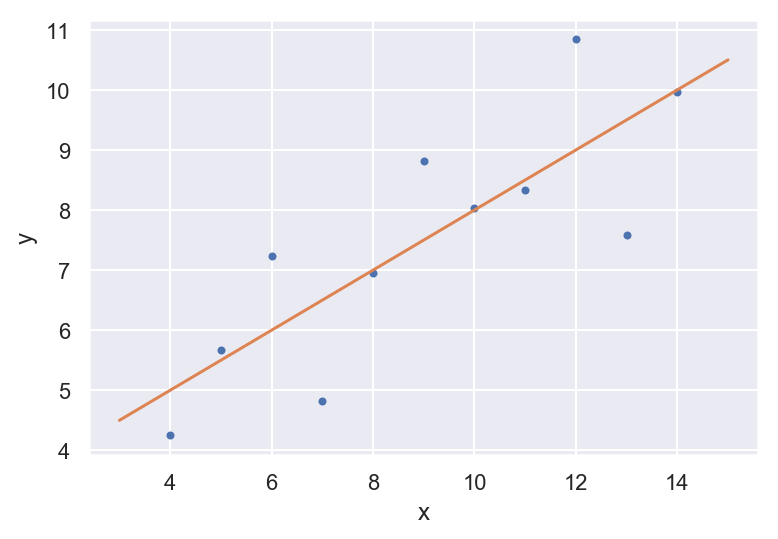

In [21]:
# Perform linear regression: a, b
a, b = np.polyfit(x, y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
plt.plot(x, y, marker='.', linestyle='none')
plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

### №8 Linear regression on all Anscombe data

In [22]:
anscombe_x = [anscombe['x' + str(i)] for i in range(1, 5)]
anscombe_y = [anscombe['y' + str(i)] for i in range(1, 5)]

In [23]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)
    
    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909095 intercept: 3.0000909090909076
slope: 0.5000000000000004 intercept: 3.000909090909089
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: 0.49990909090909064 intercept: 3.0017272727272735


## 4. Generating bootstrap replicates

### Resampling an array

#### 1) 
<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/Resampling_an_array1.png' alt='Resampling an array' width=400 align='left'>

#### 2) 

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/Resampling_an_array2.png' alt='Resampling an array' width=400 align='left'>

#### 3) 

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/Resampling_an_array3.png' alt='Resampling an array' width=400 align='left'>

#### 4) 

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/Resampling_an_array4.png' alt='Resampling an array' width=400 align='left'>

### Mean of resampled Michelson measurements

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/Mean_of_resampled_Michelson_measurements.png' alt='Mean of resampled Michelson measurements' width=400 align='left'>

### Bootstrap

* **Bootstrap** - *the use of resampled data to perform statistical inference*

* **Bootstrap sample** - *a resampled array of the data*

* **Bootstrap replicate** - *a statistic computed from a resampled array*

### Resampling engine: `np.random.choice()`

In [24]:
np.random.choice([1,2,3,4,5], size=5)

array([2, 4, 5, 5, 3])

### Computing a bootstrap replicate

In [25]:
bs_sample = np.random.choice(michelson_speed_of_light, size=100) 

In [26]:
np.mean(bs_sample)

299842.5

In [27]:
np.median(bs_sample)

299840.0

In [28]:
np.std(bs_sample)

83.86149295117515

### №9 Visualizing bootstrap samples

In [29]:
rainfall = [875.5, 648.2, 788.1, 940.3, 491.1, 743.5, 730.1, 686.5, 878.8, 865.6, 654.9, 831.5, 798.1, 681.8, 743.8,
            689.1, 752.1, 837.2, 710.6, 749.2, 967.1, 701.2, 619.0, 747.6, 803.4, 645.6, 804.1, 787.4, 646.8, 997.1,
            774.0, 734.5, 835.0, 840.7, 659.6, 828.3, 909.7, 856.9, 578.3, 904.2, 883.9, 740.1, 773.9, 741.4, 866.8,
            871.1, 712.5, 919.2, 927.9, 809.4, 633.8, 626.8, 871.3, 774.3, 898.8, 789.6, 936.3, 765.4, 882.1, 681.1,
            661.3, 847.9, 683.9, 985.7, 771.1, 736.6, 713.2, 774.5, 937.7, 694.5, 598.2, 983.8, 700.2, 901.3, 733.5, 
            964.4, 609.3, 1035.2, 718.0, 688.6, 736.8, 643.3, 1038.5, 969.0, 802.7, 876.6, 944.7, 786.6, 770.4, 808.6,
            761.3, 774.2, 559.3, 674.2, 883.6, 823.9, 960.4, 877.8, 940.6, 831.8, 906.2, 866.5, 674.1, 998.1, 789.3, 
            915.0, 737.1, 763.0, 666.7, 824.5, 913.8, 905.1, 667.8, 747.4, 784.7, 925.4, 880.2, 1086.9, 764.4, 1050.1,
            595.2, 855.2, 726.9, 785.2, 948.8, 970.6, 896.0, 618.4, 572.4, 1146.4, 728.2, 864.2, 793.0]

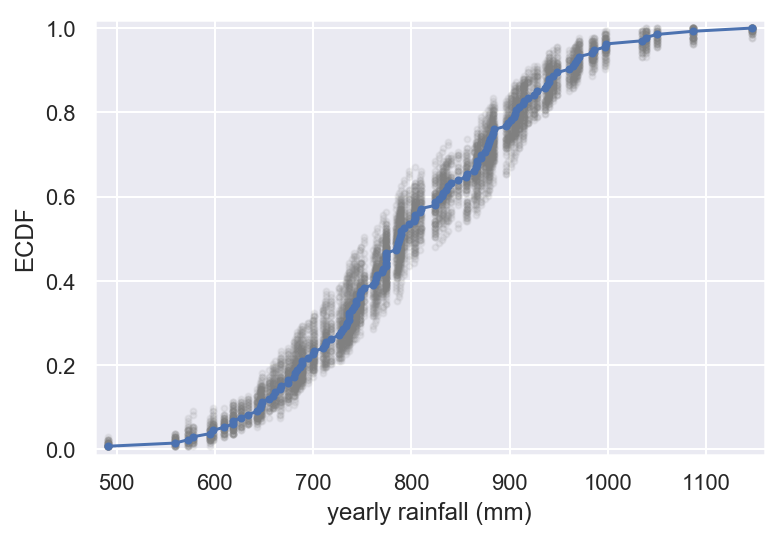

In [30]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    plt.plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)

plt.plot(x, y, marker='.')

plt.margins(0.02)

plt.xlabel('yearly rainfall (mm)')
plt.ylabel('ECDF')

plt.show()

## 5. Bootstrap confidence intervals

### Bootstrap replicate function

In [31]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    
    bs_sample = np.random.choice(data, len(data))
    
    return func(bs_sample) 

In [32]:
bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

299847.1

In [33]:
bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

299852.7

In [34]:
 bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

299857.2

### Many bootstrap replicates

In [35]:
bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

### Plotting a histogram of bootstrap replicates

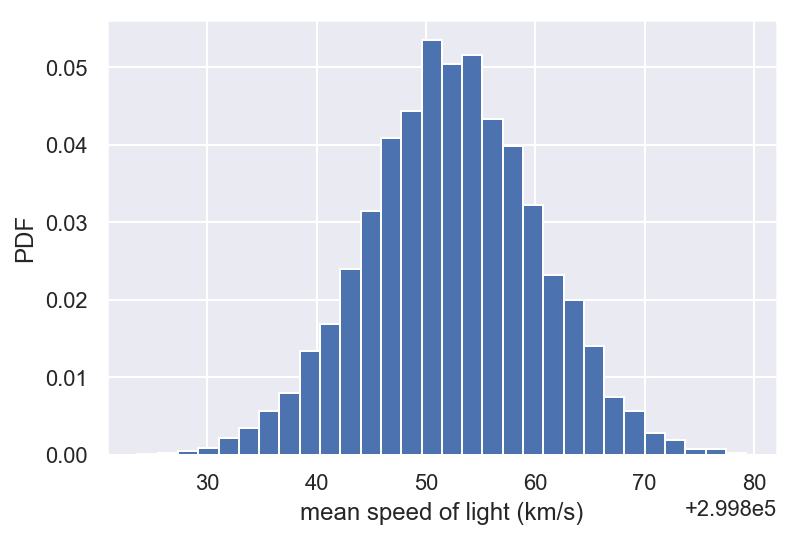

In [36]:
plt.hist(bs_replicates, bins=30, normed=True)

plt.xlabel('mean speed of light (km/s)')
plt.ylabel('PDF')

plt.show()

### Confidence interval of a statistic

* If we repeated measurements over and over again, `p%` of the observed values would lie within the `p%` confidence interval

### Bootstrap confidence interval

In [37]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([299836.7975, 299867.7   ])

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/Bootstrap_confidence_interval.png' alt='Bootstrap confidence interval' width=400 align='left'>

### №10 Generating many bootstrap replicates

In [38]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func, len(data))

    return bs_replicates

### №11 SEM (standard error of the mean)

In [39]:
def bootstrap_replicate_1d(data, func, size):
    return func(np.random.choice(data, size=len(data)))

In [40]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

10.510549150506188
10.406088827674155


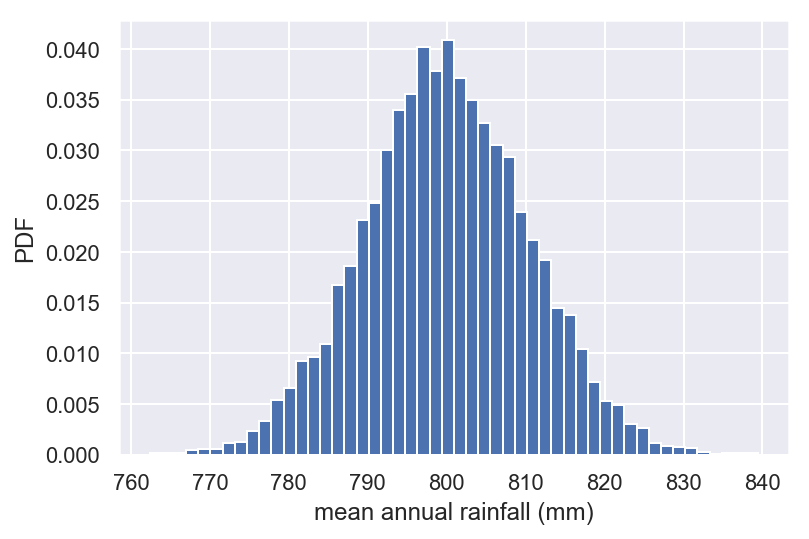

In [41]:
# Make a histogram of the results
plt.hist(bs_replicates, bins=50, normed=True)

plt.xlabel('mean annual rainfall (mm)')
plt.ylabel('PDF')

plt.show()

### №12 Bootstrap replicates of other statistics

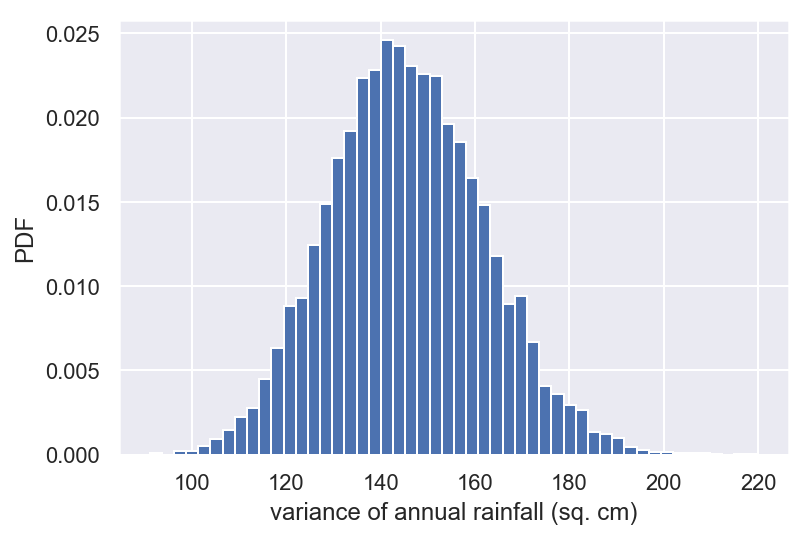

In [42]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates /= 100

# Make a histogram of the results
plt.hist(bs_replicates, normed=True, bins=50)

plt.xlabel('variance of annual rainfall (sq. cm)')
plt.ylabel('PDF')

# Show the plot
plt.show()

### №13 Confidence interval on the rate of no-hitters

In [43]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

95% confidence interval = [662.23505976 871.19501992] games


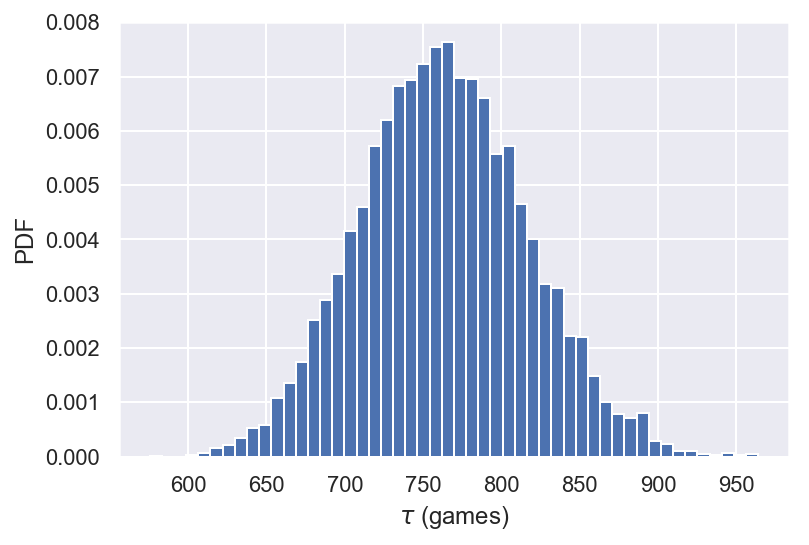

In [44]:
plt.hist(bs_replicates, bins=50, normed=True)

plt.xlabel(r'$\tau$ (games)')
plt.ylabel('PDF')

plt.show()

## 6. Pairs bootstrap

### 2008 US swing state election results

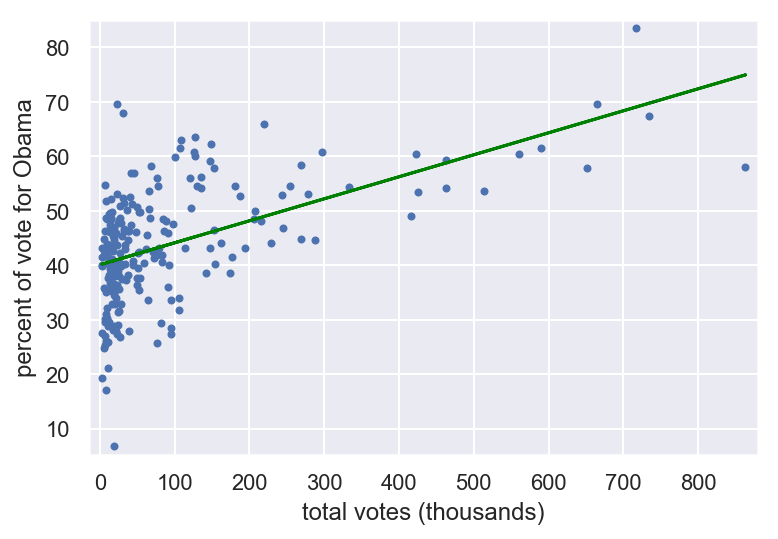

In [45]:
plt.plot(total_votes/1000, dem_share, marker='.', linestyle='none')

plt.margins(0.02)
plt.xlabel('total votes (thousands)')
plt.ylabel('percent of vote for Obama')

a, b = np.polyfit(total_votes/1000, dem_share, 1)

y = a * total_votes/1000 + b

plt.plot(total_votes/1000, y, color='green')

plt.show()

### Nonparametric inference

* Make no assumptions about the model or probability distribution underlying the data

### Pairs bootstrap for linear regression

* Resample data *in pairs*
* Compute slope and intercept from resampled data
* Each slope and intercept is a bootstrap replicate
* Compute confidence intervals from percentiles of bootstrap replicates

### Generating a pairs bootstrap sample

In [46]:
np.arange(7) 

array([0, 1, 2, 3, 4, 5, 6])

In [47]:
inds = np.arange(len(total_votes))

bs_inds = np.random.choice(inds, len(inds))

bs_total_votes = total_votes[bs_inds]

bs_dem_share = dem_share[bs_inds]

### Computing a pairs bootstrap replicate

In [48]:
bs_slope, bs_intercept = np.polyfit(bs_total_votes, bs_dem_share, 1)
bs_slope, bs_intercept

(3.7564780918334224e-05, 40.381944499798166)

In [49]:
np.polyfit(total_votes, dem_share, 1) # fit of original

array([4.0370717e-05, 4.0113912e+01])

### 2008 US swing state election results

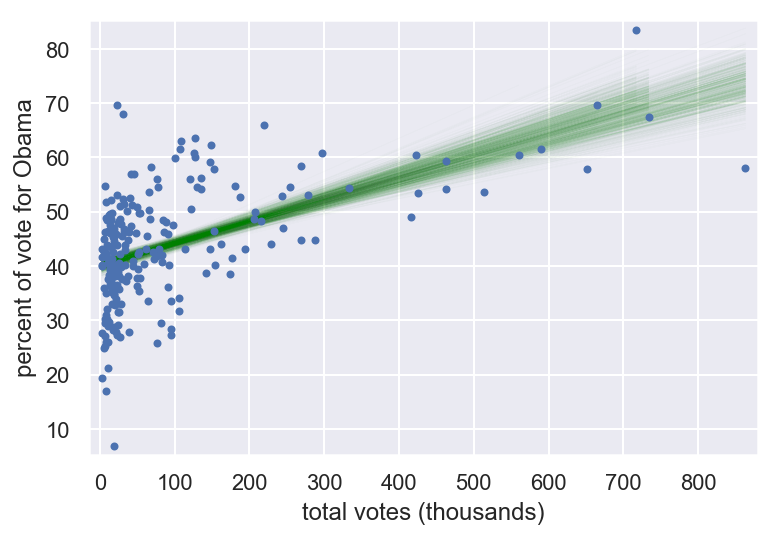

In [50]:
size = 1000

inds = np.arange(len(total_votes/1000))

bs_slope_reps = np.empty(size)
bs_intercept_reps = np.empty(size)

for i in range(size):
    bs_inds = np.random.choice(inds, size=len(inds))
    bs_x, bs_y = (total_votes/1000)[bs_inds], dem_share[bs_inds]
    bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
    plt.plot(bs_x, bs_slope_reps[i] * bs_x + bs_intercept_reps[i], linewidth=0.4, alpha=0.01, color='green')
    
plt.plot(total_votes/1000, dem_share, marker='.', linestyle='none')

plt.margins(0.02)
plt.xlabel('total votes (thousands)')
plt.ylabel('percent of vote for Obama')

plt.show()

### №14 A function to do pairs bootstrap

In [51]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

### №15 Pairs bootstrap of literacy/fertility data

[0.04378788 0.05555417]


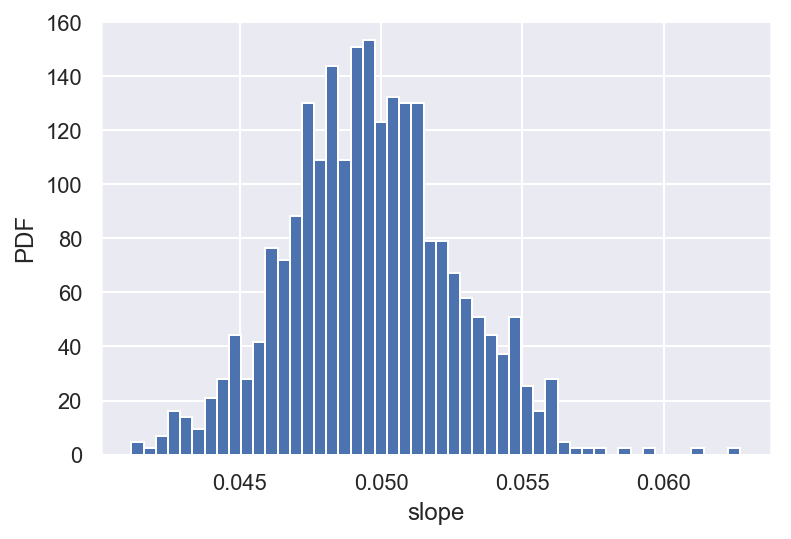

In [52]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

plt.hist(bs_slope_reps, bins=50, normed=True)

plt.xlabel('slope')
plt.ylabel('PDF')

plt.show()

### №16 Plotting bootstrap regressions

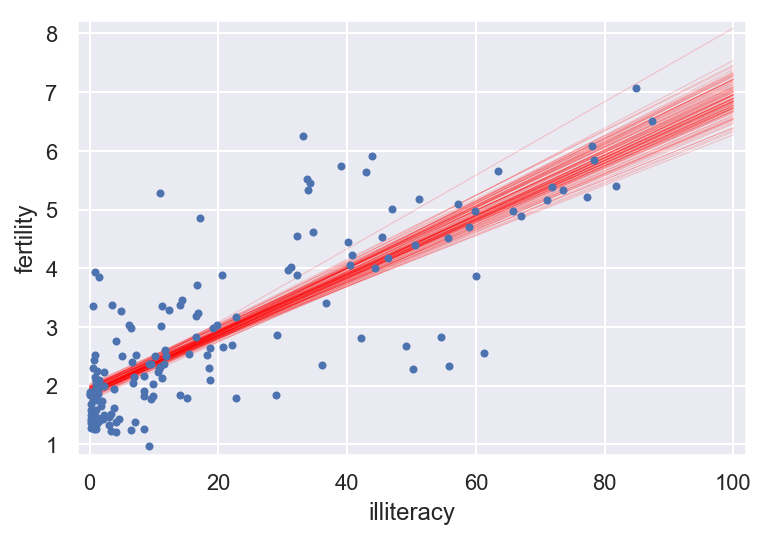

In [53]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i], linewidth=0.5, alpha=0.2, color='red')

plt.plot(illiteracy, fertility, marker='.', linestyle='none')

plt.xlabel('illiteracy')
plt.ylabel('fertility')

plt.margins(0.02)

plt.show()

## 7. Formulating and simulating hypotheses

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/PA_OH.png' alt='PA and OH states' width=400 align='left'>

### Hypothesis testing

* Assessment of how reasonable the observed data are assuming a hypothesis is true
* **Null hypothesis** - another name for the hypothesis you are testing

### ECDFs of swing state election results

In [54]:
dem_share_OH = df_swing[df_swing['state'] == 'OH']['dem_share']
dem_share_PA = df_swing[df_swing['state'] == 'PA']['dem_share']

x_OH, y_OH = ecdf(dem_share_OH)
x_PA, y_PA = ecdf(dem_share_PA)

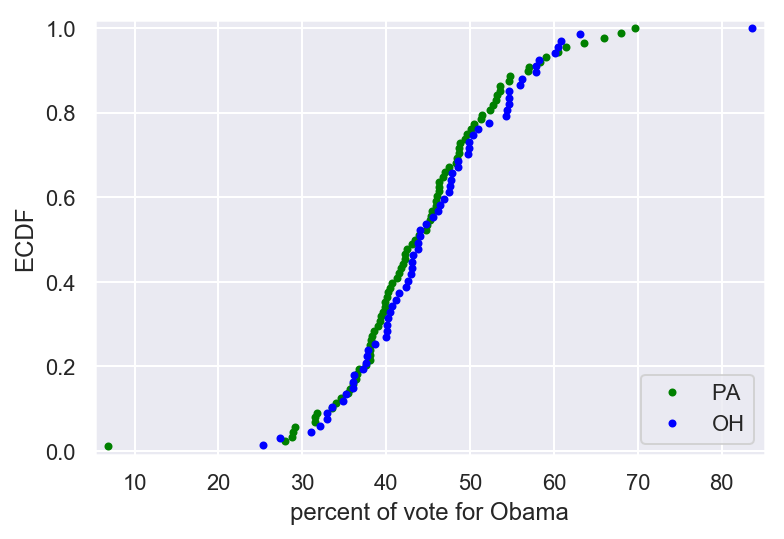

In [55]:
plt.plot(x_OH, y_OH, marker='.', linestyle='none', color='green')
plt.plot(x_PA, y_PA, marker='.', linestyle='none', color='blue')

plt.xlabel('percent of vote for Obama')
plt.ylabel('ECDF')

plt.margins(0.02)
plt.legend(['PA', 'OH'], loc='lower right')

plt.show()

### Percent vote for Obama

In [56]:
print('\t', ' PA', '    OH', '   PA-OH', '\n',
      'mean   ', round(dem_share_PA.mean(), 1), ' ', round(dem_share_OH.mean(), 1),
      '  ', round(dem_share_PA.mean() - dem_share_OH.mean(), 1), '\n',
      'median ', round(dem_share_PA.median(), 1), ' ', round(dem_share_OH.median(), 1),
      '  ', round(dem_share_PA.median() - dem_share_OH.median(), 1), '\n',
      'std     ', round(dem_share_PA.std(), 1), '  ', round(dem_share_OH.std(), 1),
      ' ', round(dem_share_PA.std() - dem_share_OH.std(), 1))

	  PA     OH    PA-OH 
 mean    45.5   44.3    1.2 
 median  44.0   43.7    0.4 
 std      9.8    9.9   -0.1


### Simulating the hypothesis

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/Simulating_the_hypothesis1.png' alt='Simulating the hypothesis' width=500 align='left'>

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/Simulating_the_hypothesis2.png' alt='Simulating the hypothesis' width=500 align='left'>

### Permutation

* Random reordering of entries in an array

### Generating a permutation sample

In [57]:
dem_share_both = np.concatenate((dem_share_PA, dem_share_OH))
dem_share_perm = np.random.permutation(dem_share_both)

perm_sample_PA = dem_share_perm[:len(dem_share_PA)]
perm_sample_OH = dem_share_perm[len(dem_share_PA):]

### №17 Generating a permutation sample

In [58]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    
    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))
    
    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)
    
    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1, perm_sample_2

### №18 Visualizing permutation sampling

In [59]:
rain_november = [83.6, 30.9, 62.2, 37.0, 41.0, 160.2, 18.2, 122.4, 71.3, 44.2, 49.1, 37.6, 114.5, 28.8, 82.5, 71.9, 50.7, 67.7, 112.0, 63.6, 42.8, 57.2, 99.1, 86.4, 84.4, 38.1, 17.7, 102.2, 101.3, 58.0, 82.0, 101.4, 81.4, 100.1, 54.6, 39.6, 57.5, 29.2, 48.8, 37.3, 115.4, 55.6, 62.0, 95.0, 84.2, 118.1, 153.2, 83.4, 104.7, 59.0, 46.4, 50.0, 147.6, 76.8, 59.9, 101.8, 136.6, 173.0, 92.5, 37.0, 59.8, 142.1, 9.9, 158.2, 72.6, 28.0, 112.9, 119.3, 199.2, 50.7, 44.0, 170.7, 67.2, 21.4, 61.3, 15.6, 106.0, 116.2, 42.3, 38.5, 132.5, 40.8, 147.5, 93.9, 71.4, 87.3, 163.7, 141.4, 62.6, 84.9, 28.8, 121.1, 28.6, 32.4, 112.0, 50.0, 96.9, 81.8, 70.4, 117.5, 41.2, 124.9, 78.2, 93.0, 53.5, 50.5, 42.6, 47.9, 73.1, 129.1, 56.9, 103.3, 60.5, 134.3, 93.1, 49.5, 48.2, 167.9, 27.0, 111.1, 55.4, 36.2, 57.4, 66.8, 58.3, 60.0, 161.6, 112.7, 37.4, 110.6, 56.6, 95.8, 126.8]
rain_june = [66.2, 39.7, 76.4, 26.5, 11.2, 61.8, 6.1, 48.4, 89.2, 104.0, 34.0, 60.6, 57.1, 79.1, 90.9, 32.3, 63.8, 78.2, 27.5, 43.4, 30.1, 17.3, 77.5, 44.9, 92.2, 39.6, 79.4, 66.1, 53.5, 98.5, 20.8, 55.5, 39.6, 56.0, 65.1, 14.8, 13.2, 88.1, 8.4, 32.1, 19.6, 40.4, 2.2, 77.5, 105.4, 77.2, 38.0, 27.1, 111.8, 17.2, 26.7, 23.3, 77.2, 87.2, 27.7, 50.6, 60.3, 15.1, 6.0, 29.4, 39.3, 56.3, 80.4, 85.3, 68.4, 72.5, 13.3, 28.4, 14.7, 37.4, 49.5, 57.2, 85.9, 82.1, 31.8, 126.6, 30.7, 41.4, 33.9, 13.5, 99.1, 70.2, 91.8, 61.3, 13.7, 54.9, 62.5, 24.2, 69.4, 83.1, 44.0, 48.5, 11.9, 16.6, 66.4, 90.0, 34.9, 132.8, 33.4, 225.0, 7.6, 40.9, 76.5, 48.0, 140.0, 55.9, 54.1, 46.4, 68.6, 52.2, 108.3, 14.6, 11.3, 29.8, 130.9, 152.4, 61.0, 46.6, 43.9, 30.9, 111.1, 68.5, 42.2, 9.8, 285.6, 56.7, 168.2, 41.2, 47.8, 166.6, 37.8, 45.4, 43.2]

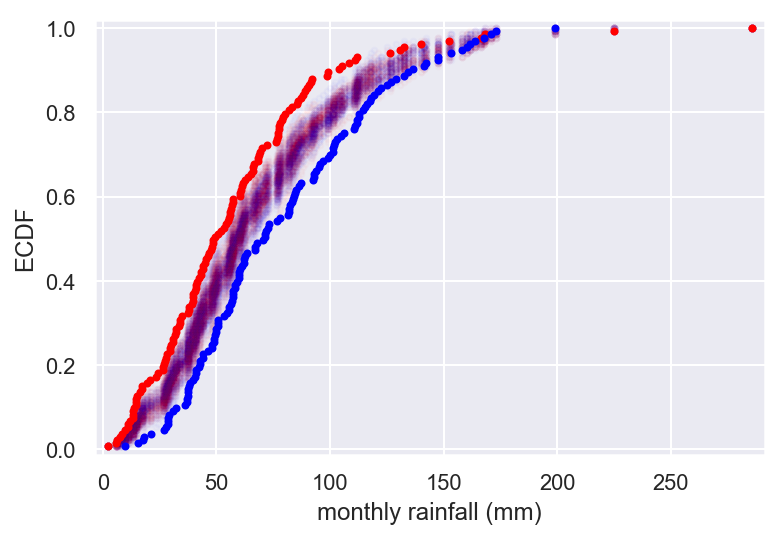

In [60]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

## 8. Test statistics and p-values

### Test statistic

* A single number that can be computed from observed data and from data you simulate under the null hypothesis
* It serves as a basis of comparison between the two

### Permutation replicate

In [61]:
np.mean(perm_sample_PA) - np.mean(perm_sample_OH)

-1.488278493894164

In [62]:
np.mean(dem_share_PA) - np.mean(dem_share_OH) # orig. data

1.1582360922659518

### Mean vote difference under null hypothesis

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/Mean_vote_difference_under_null_hypothesis1.png' alt='Mean vote difference under null hypothesis' width=400 align='left'>

### p-value
* The probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true


* **NOT the probability that the null hypothesis is true**

### Statistical significance

* Determined by the smallness of a p-value

### Null hypothesis significance testing (NHST)

* Another name for what we are doing in this chapter


* **statistical significance ≠ practical significance**

### №19 Generating permutation replicates

In [63]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

### №20 Look before you leap: EDA before hypothesis testing

In [64]:
frog_tongue = pd.read_csv('[16]Statictical_Thinking_in_Python_Part2/frog_tongue.csv', skiprows=14)

index_drop = [i for i in range(20)] + [i for i in range(40, 60)]

frog_tongue_2 = frog_tongue[['ID', 'impact force (mN)']]
frog_tongue_2.drop(index_drop, axis=0, inplace=True) 

for i in frog_tongue_2.index:
    if frog_tongue_2['ID'][i] == 'II':
        frog_tongue_2['ID'][i] = 'A'
    else:
        frog_tongue_2['ID'][i] = 'B'

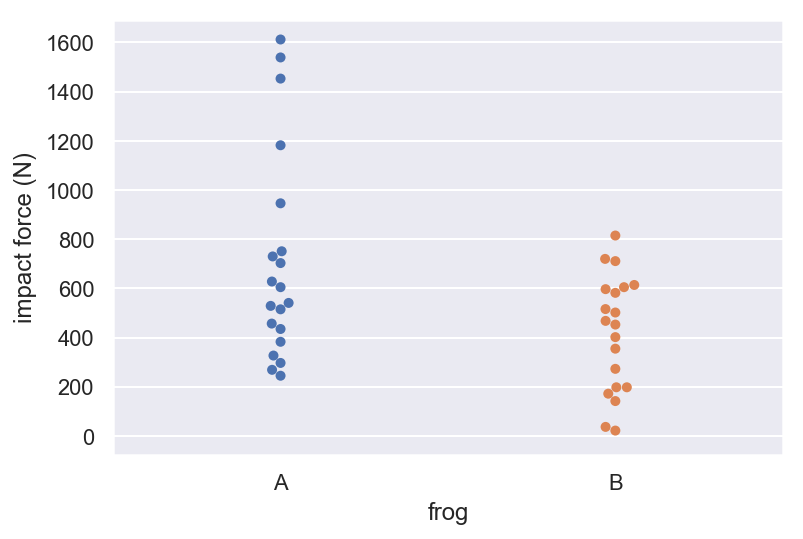

In [65]:
sns.swarmplot(x='ID', y='impact force (mN)', data=frog_tongue_2)

plt.xlabel('frog')
plt.ylabel('impact force (N)')

plt.show()

### №21 Permutation test on frog data

In [66]:
force_a = frog_tongue_2[frog_tongue_2['ID'] == 'A']['impact force (mN)'] / 1000
force_b = frog_tongue_2[frog_tongue_2['ID'] == 'B']['impact force (mN)'] / 1000

In [67]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b, diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.006


## 9. Bootstrap hypothesis tests

### Pipeline for hypothesis testing

* Clearly state the null hypothesis


* Define your test statistic


* Generate many sets of simulated data assuming the null hypothesis is true


* Compute the test statistic for each simulated data set


* The p-value is the fraction of your simulated data sets for which the test statistic is at least as extreme as for the real data

### Michelson and Newcomb: speed of light pioneers

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/Michelson_and_Newcomb.png' alt='Michelson and Newcomb: speed of light pioneers' width=500 align='left'>

### The data we have

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/Michelson_and_Newcomb2.png' alt='Michelson and Newcomb: speed of light pioneers' width=600 align='left'>

### Null hypothesis

* The true mean speed of light in Michelson’s experiments was actually Newcomb's reported value

### Shifting the Michelson data

In [68]:
newcomb_value = 299860 # km/s

michelson_shifted = michelson_speed_of_light - michelson_speed_of_light.mean() + newcomb_value

In [69]:
x_michelson, y_michelson = ecdf(michelson_speed_of_light)
x_newcomb, y_newcomb = ecdf(michelson_shifted)

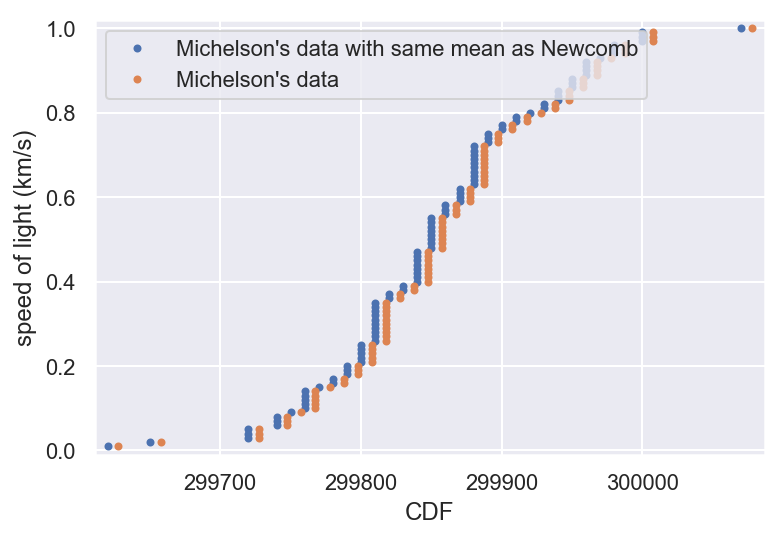

In [70]:
plt.plot(x_michelson, y_michelson, linestyle='none', marker='.')
plt.plot(x_newcomb, y_newcomb, linestyle='none', marker='.')

plt.xlabel('CDF')
plt.ylabel('speed of light (km/s)')

plt.margins(0.02)
plt.legend(["Michelson's data with same mean as Newcomb", "Michelson's data"])

plt.show()

### Calculating the test statistic

In [71]:
def diff_from_newcomb(data, newcomb_value=299860):
    return np.mean(data) - newcomb_value

In [72]:
diff_obs = diff_from_newcomb(michelson_speed_of_light)
diff_obs 

-7.599999999976717

### Computing the p-value

In [73]:
bs_replicates = draw_bs_reps(michelson_shifted, diff_from_newcomb, 10000)

In [74]:
p_value = np.sum(bs_replicates <= diff_obs) / 10000
p_value

0.1652

### One sample test
* Compare one set of data to a single number

### Two sample test

* Compare two sets of data

### №22 A one-sample bootstrap hypothesis test

In [75]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0058


### №23 A two-sample bootstrap hypothesis test for difference of means

In [76]:
forces_concat = pd.concat([force_a, force_b])

In [77]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force 

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0065


## 10. A/B testing

### Is your redesign effective?

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/redesign_effective.png' alt='Is your redesign effective' width=400 align='left'>

### Null hypothesis

* The click-through rate is not affected by the redesign

### Permutation test of clicks through

```python
In [1]: import numpy as np
    
In [2]: # clickthrough_A, clickthrough_B: arr. of 1s and 0s
    
In [3]: def diff_frac(data_A, data_B):
            frac_A = np.sum(data_A) / len(data_A)
            frac_B = np.sum(data_B) / len(data_B)
            return frac_B - frac_A

In [4]: diff_frac_obs = diff_frac(clickthrough_A, clickthrough_B)
    
In [5]: perm_replicates = np.empty(10000)
    
In [6]: for i in range(10000):
            perm_replicates[i] = permutation_replicate(
            clickthrough_A, clickthrough_B, diff_frac)

In [7]: p_value = np.sum(perm_replicates >= diff_frac_obs) / 10000
    
In [8]: p_value
Out[8]: 0.016 
```

### A/B test

* Used by organizations to see if a strategy change gives a better result

### Null hypothesis of an A/B test

* The test statistic is impervious to the change

### №24 The vote for the Civil Rights Act in 1964

In [78]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems == True) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


### №25 A time-on-website analog

In [79]:
nht_dead, nht_live = [], []

for i in range(len(mlb)):
    if i < 91:
        nht_dead.append(mlb.date[i])
    else:
        nht_live.append(mlb.date[i])

In [80]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, 10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


## 11. Test of correlation

### 2008 US swing state election results

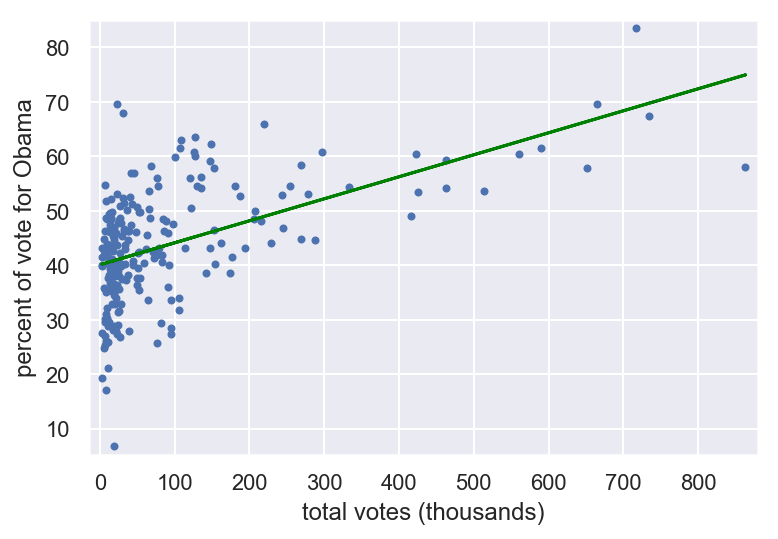

p = 0.5361973649586781


In [81]:
plt.plot(total_votes/1000, dem_share, marker='.', linestyle='none')

plt.margins(0.02)
plt.xlabel('total votes (thousands)')
plt.ylabel('percent of vote for Obama')

a, b = np.polyfit(total_votes/1000, dem_share, 1)

y = a * total_votes/1000 + b

plt.plot(total_votes/1000, y, color='green')

plt.show()

print('p =', pearson_r(total_votes/1000, dem_share))

### Hypothesis test of correlation

* Posit null hypothesis: the two variables are completely uncorrelated
* Simulate data assuming null hypothesis is true
* Use Pearson correlation, ρ, as test statistic
* Compute p-value as fraction of replicates that have ρ at least as large as observed. 

### More populous counties voted for Obama

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/counties_voted_for_Obama.png' alt='More populous counties voted for Obama' width=500 align='left'>

### №26 Simulating a null hypothesis concerning correlation

The observed correlation between female illiteracy and fertility in the data set of 162 countries may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this null hypothesis in the next exercise.

To do the test, you need to simulate the data assuming the null hypothesis is true. Of the following choices, which is the best way to to do it?

* Do a permutation test: Permute the illiteracy values but leave the fertility values fixed to generate a new set of (illiteracy, fertility) data.

### №27 Hypothesis test on Pearson correlation

In [82]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


### №28 Do neonicotinoid insecticides have unintended consequences?

In [83]:
bee_sperm = pd.read_csv('[16]Statictical_Thinking_in_Python_Part2/bee_sperm.csv', skiprows=3)

control = bee_sperm[bee_sperm['Treatment'] == 'Control']['Alive Sperm Millions']
treated = bee_sperm[bee_sperm['Treatment'] == 'Pesticide']['Alive Sperm Millions']

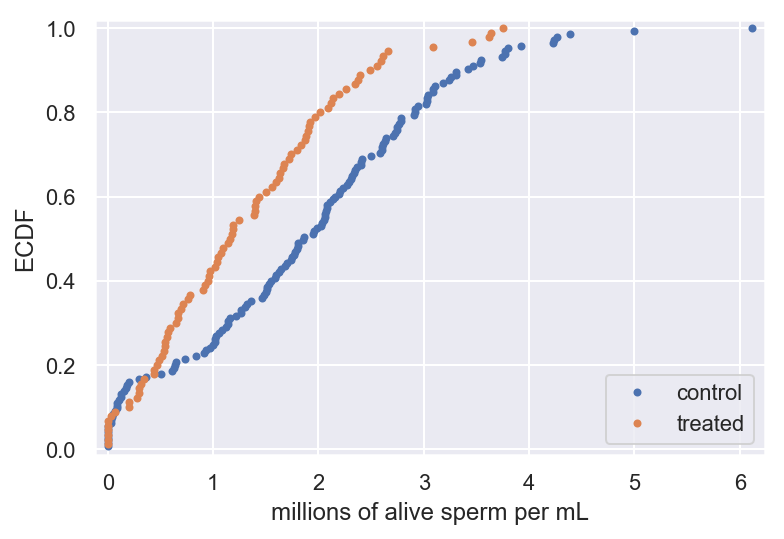

In [84]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')

plt.show()

### №29 Bootstrap hypothesis test on bee sperm counts

In [85]:
# Compute the difference in mean sperm count: diff_means
diff_means = diff_of_means(control, treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted, np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) / len(bs_replicates)

print('p-value =', p)

p-value = 0.0001


## 12. Darwin's finches: A full-blown statistical analysis

### Your well-equipped toolbox

* Graphical and quantitative EDA
* Parameter estimation
* Confidence interval calculation
* Hypothesis testing

### The finches of Daphne Major

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/The_finches_of_Daphne_Major.png' alt='The finches of Daphne Major' width=400 align='left'>

### Our data source

* Peter and Rosemary Grant 40 Years of Evolution: Darwin's Finches on Daphne Major Island Princeton University Press, 2014
* Data acquired from [Dryad Digital Repository](htpp://dx.doi.org/10.5061/dryad.g6g3h)

### The dimensions of the finch beak

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/beak_length.png' alt='Beak length' width=400 align='left'>

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/beak_depth.png' alt='Beak depgth' width=400 align='left'>

### Investigation of *G. scandens* beak depth

* EDA of beak depths in 1975 and 2012
* Parameter estimates of mean beak depth
* Hypothesis test: did the beaks get deeper?

### №30 EDA of beak depths of Darwin's finches

In [119]:
finch_beaks_1975 = pd.read_csv('[16]Statictical_Thinking_in_Python_Part2/finch_beaks_1975.csv')
finch_beaks_2012 = pd.read_csv('[16]Statictical_Thinking_in_Python_Part2/finch_beaks_2012.csv')

In [120]:
finch_beaks_1975['year'] = 1975
finch_beaks_2012['year'] = 2012

finch_beaks_2012.columns = finch_beaks_1975.columns

finch_beaks_1975.drop(columns='band', inplace=True)
finch_beaks_2012.drop(columns='band', inplace=True)

finch_beaks = pd.merge(finch_beaks_1975, finch_beaks_2012, on=list(finch_beaks_1975.columns), how='outer', )

beaks = finch_beaks[finch_beaks['species'] == 'scandens']

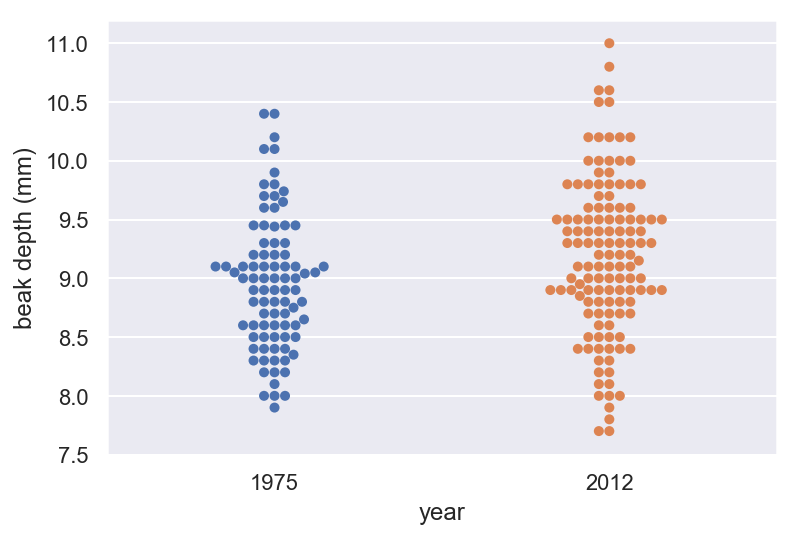

In [123]:
# Create bee swarm plot
sns.swarmplot(x='year', y='Beak depth, mm', data=beaks)

# Label the axes
plt.xlabel('year')
plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

### №31 ECDFs of beak depths

In [126]:
bd_1975 = np.array(beaks[finch_beaks['year'] == 1975]['Beak depth, mm'])
bd_2012 = np.array(beaks[finch_beaks['year'] == 2012]['Beak depth, mm'])

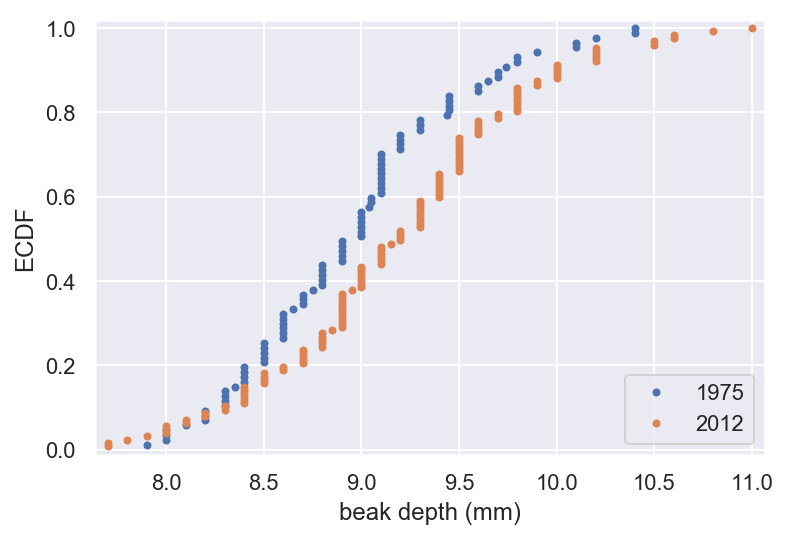

In [127]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
plt.plot(x_1975, y_1975, marker='.', linestyle='none')
plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
plt.xlabel('beak depth (mm)')
plt.ylabel('ECDF')
plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

### №32 Parameter estimates of beak depths

In [128]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.2262204724409429 mm
95% confidence interval = [0.06176731 0.39074104] mm


### №33 Hypothesis test: Are beaks deeper in 2012?

In [129]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0031


## 13. Variation in beak shapes

### The drought of winter 1976/1977

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/The_drought_of_winter.png' alt='The drought of winter' width=400 align='left'>

### Hint

* `draw_bs_pairs_linreg()` will come in handy

### №34 EDA of beak length and depth

In [130]:
bl_1975 = np.array(beaks[finch_beaks['year'] == 1975]['Beak length, mm'])
bl_2012 = np.array(beaks[finch_beaks['year'] == 2012]['Beak length, mm'])

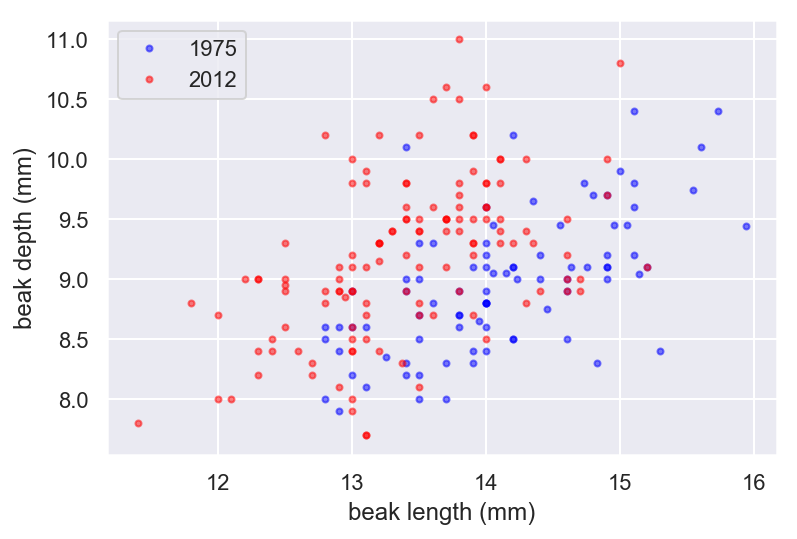

In [131]:
# Make scatter plot of 1975 data
plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)
# Label axes and make legend
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

### №35 Linear regressions

In [132]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])

intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])


# Print the results
print('1975: slope =', slope_1975, 'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975, 'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012, 'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012, 'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605934 conf int = [0.34271561 0.59473883]
1975: intercept = 2.390875236584226 conf int = [0.62139846 4.13671672]
2012: slope = 0.4626303588353127 conf int = [0.32397141 0.59737316]
2012: intercept = 2.9772474982360206 conf int = [1.21803879 4.85834205]


### №35 Displaying the linear regression results

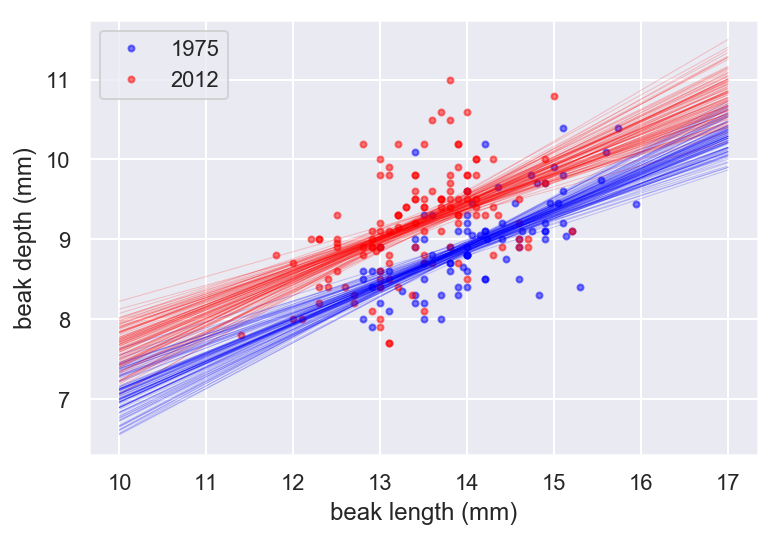

In [133]:
# Make scatter plot of 1975 data
plt.plot(bl_1975, bd_1975, marker='.', linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
plt.plot(bl_2012, bd_2012, marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i]*x + bs_intercept_reps_1975[i], linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i]*x + bs_intercept_reps_2012[i], linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

### №36 Beak length to depth ratio

In [134]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975/bd_1975
ratio_2012 = bl_2012/bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975, 'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012, 'conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 conf int = [1.55720859 1.6004773 ]
2012: mean ratio = 1.4658342276847767 conf int = [1.44509842 1.48795085]


## 14. Calculation of heredity

### The finches of Daphne Major

<img src='[16]Statictical_Thinking_in_Python_Part2/Pictures/The_finches_of_Daphne_Major.png' alt='The finches of Daphne Major' width=400 align='left'>

### Heredity

* The tendency for parental traits to be inherited by offspring

### №37 EDA of heritability

In [157]:
fortis_heredity = pd.read_csv('[16]Statictical_Thinking_in_Python_Part2/fortis_beak_depth_heredity.csv')
scandens_heredity = pd.read_csv('[16]Statictical_Thinking_in_Python_Part2/scandens_beak_depth_heredity.csv')

In [158]:
fortis_heredity['Mid-parent'] = 0.0

for i in range(len(fortis_heredity)):
    fortis_heredity['Mid-parent'][i] = np.mean([fortis_heredity['Male BD'][i], fortis_heredity['Female BD'][i]])

In [161]:
bd_parent_scandens = np.array(scandens_heredity['mid_parent'])
bd_offspring_scandens = np.array(scandens_heredity['mid_offspring'])

bd_parent_fortis = np.array(fortis_heredity['Mid-parent'])
bd_offspring_fortis = np.array(fortis_heredity['Mid-offspr'])

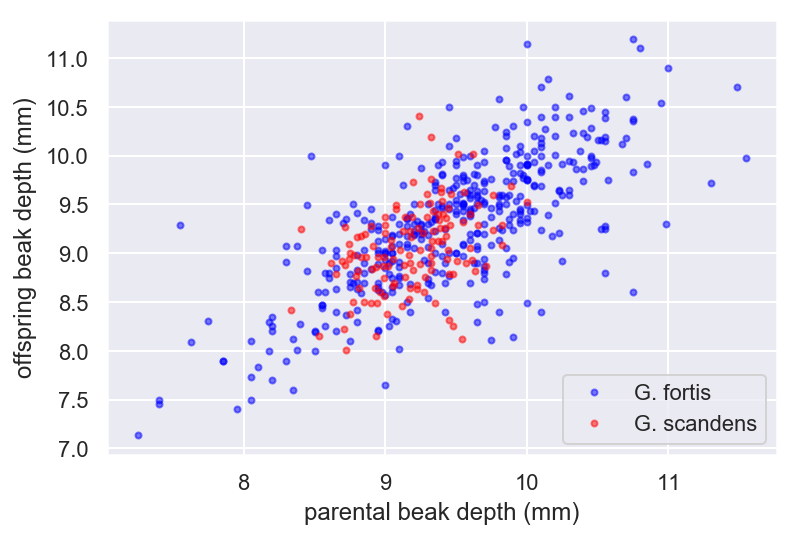

In [162]:
# Make scatter plots
plt.plot(bd_parent_fortis, bd_offspring_fortis, marker='.', linestyle='none', color='blue', alpha=0.5)
plt.plot(bd_parent_scandens, bd_offspring_scandens, marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes
plt.xlabel('parental beak depth (mm)')
plt.ylabel('offspring beak depth (mm)')

# Add legend
plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()

### №38 Correlation of offspring and parental data

In [163]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

### №39 Pearson correlation of offspring and parental data

In [164]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, 1000)

bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, 1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

G. scandens: 0.4117063629401258 [0.27231532 0.54784581]
G. fortis: 0.7283412395518487 [0.66952928 0.78026705]


### №40 Measuring heritability

In [170]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[1,0] / covariance_matrix[0,0]

In [171]:
# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

G. scandens: 0.5485340868685982 [0.35540215 0.76557371]
G. fortis: 0.7229051911438156 [0.64807048 0.79221703]


### №41 Is beak depth heritable at all in G. scandens?

In [172]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

p-val = 0.0
